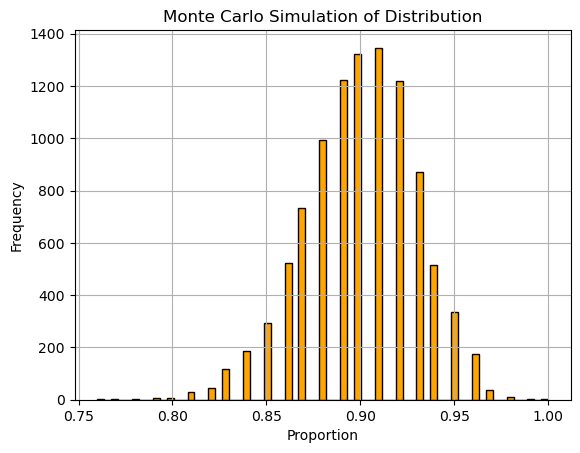

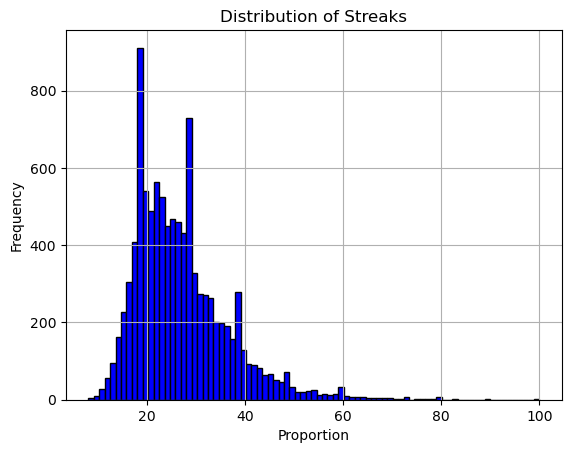

In [35]:
import random as rm
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby

# -------------------------------------------------------------
# Function to simulate 'n' biased coin tosses with a given success probability
# Returns:
# - the proportion of successes (1s)
# - the length of the longest streak of 1s
# -------------------------------------------------------------
def simulate_n_coin(n: int, percent_success: float) -> int:
    lst = []

    # Define weights for biased coin:
    # e.g., percent_success = 0.9 → 90% chance of 1, 10% chance of 0
    x = percent_success
    y = 1 - percent_success
    weights = [x, y]          # probability weights
    values = [1, 0]           # 1 = success, 0 = failure

    # Simulate 'n' coin tosses using the weights
    for _ in range(n):
        lst.append(rm.choices(values, weights=weights, k=1)[0])  # [0] extracts the single value

    # Convert list to NumPy array for vectorized operations
    lst = np.array(lst)

    # Calculate the longest consecutive streak of 1s using groupby
    longest_1s = max((len(list(group)) for val, group in groupby(lst) if val == 1), default=0)

    # Return the proportion of 1s and the longest streak
    return np.mean(lst > 0), longest_1s

# -------------------------------------------------------------
# Monte Carlo function: runs many simulations of the coin toss
# Returns:
# - list of proportions from each simulation
# - list of longest streaks from each simulation
# -------------------------------------------------------------
def monte_carlo(trials: int, n: int, percent: int):
    new_lst = []  # list of proportions
    strk = []     # list of longest streaks

    # Run 'trials' number of simulations
    for _ in range(trials):
        lst, streak = simulate_n_coin(n, percent)
        new_lst.append(lst)
        strk.append(streak)

    return new_lst, strk

# -------------------------------------------------------------
# Run the simulation: 10,000 trials of 100 coin tosses each
# With a biased coin (90% chance of success / 1)
# -------------------------------------------------------------
values, strk = monte_carlo(10000, 100, 0.9)
#used to test different percent of success for the different distributions

# -------------------------------------------------------------
# Plot histogram of proportions of 1s across all simulations
# -------------------------------------------------------------
plt.hist(values, bins='auto', color="orange", edgecolor='black')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Distribution')
plt.grid()
plt.show()

# -------------------------------------------------------------
# Plot histogram of longest streaks of 1s from all simulations
# -------------------------------------------------------------
plt.hist(strk, bins='auto', color="blue", edgecolor='black')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.title('Distribution of Streaks')
plt.grid()
plt.show()